In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:

finance_data = pd.read_csv(r'C:\Users\andil\Desktop\Datasets\My DATASETS\Finance_data.csv')


#The dataset fits the problem description as it encompasses a wide range of financial, demographic, and behavioral variables that are vital for analyzing individuals' investment choices.

Financial data helps in assessing investment patterns and trends.
Demographic data allows for segmentation and understanding of different groups' investment behaviors.
Behavioral data sheds light on the motivations and strategies behind these financial decisions.
By analyzing these variables together, researchers can gain comprehensive insights into how different factors influence investment behavior, which can inform financial planning, policy-making, and marketing strategies in the finance sector
It fits the problem description as it contains comprehensive financial, demographic, and behavioral variables that allow for in-depth analysis of investment behavior.

The combination of financial data helps assess investment trends, demographic data allows for segmentation, and behavioral data provides insights into the motivations behind financial decisions.

This rich dataset can be very effective for understanding how different factors influence individual investment choices, which is crucial for financial planning, research, and policy formulation.

In [87]:
finance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   gender                             40 non-null     object
 1   age                                40 non-null     int64 
 2   Investment_Avenues                 40 non-null     object
 3   Mutual_Funds                       40 non-null     int64 
 4   Equity_Market                      40 non-null     int64 
 5   Debentures                         40 non-null     int64 
 6   Government_Bonds                   40 non-null     int64 
 7   Fixed_Deposits                     40 non-null     int64 
 8   PPF                                40 non-null     int64 
 9   Gold                               40 non-null     int64 
 10  Stock_Marktet                      40 non-null     object
 11  Factor                             40 non-null     object
 12  Objective 

In [88]:
print(finance_data.shape)


(40, 24)


In [89]:
print(finance_data.head())

   gender  age Investment_Avenues  Mutual_Funds  Equity_Market  Debentures  \
0  Female   34                Yes             1              2           5   
1  Female   23                Yes             4              3           2   
2    Male   30                Yes             3              6           4   
3    Male   22                Yes             2              1           3   
4  Female   24                 No             2              1           3   

   Government_Bonds  Fixed_Deposits  PPF  Gold  ...           Duration  \
0                 3               7    6     4  ...          1-3 years   
1                 1               5    6     7  ...  More than 5 years   
2                 2               5    1     7  ...          3-5 years   
3                 7               6    4     5  ...   Less than 1 year   
4                 6               4    5     7  ...   Less than 1 year   

  Invest_Monitor   Expect       Avenue What are your savings objectives?  \
0        M

In [90]:
print(finance_data.describe())

             age  Mutual_Funds  Equity_Market  Debentures  Government_Bonds  \
count  40.000000     40.000000      40.000000   40.000000         40.000000   
mean   27.800000      2.550000       3.475000    5.750000          4.650000   
std     3.560467      1.197219       1.131994    1.675617          1.369072   
min    21.000000      1.000000       1.000000    1.000000          1.000000   
25%    25.750000      2.000000       3.000000    5.000000          4.000000   
50%    27.000000      2.000000       4.000000    6.500000          5.000000   
75%    30.000000      3.000000       4.000000    7.000000          5.000000   
max    35.000000      7.000000       6.000000    7.000000          7.000000   

       Fixed_Deposits        PPF       Gold  
count       40.000000  40.000000  40.000000  
mean         3.575000   2.025000   5.975000  
std          1.795828   1.609069   1.143263  
min          1.000000   1.000000   2.000000  
25%          2.750000   1.000000   6.000000  
50%         

In [91]:
# Checking Missing Values
print(finance_data.isnull().sum())


gender                               0
age                                  0
Investment_Avenues                   0
Mutual_Funds                         0
Equity_Market                        0
Debentures                           0
Government_Bonds                     0
Fixed_Deposits                       0
PPF                                  0
Gold                                 0
Stock_Marktet                        0
Factor                               0
Objective                            0
Purpose                              0
Duration                             0
Invest_Monitor                       0
Expect                               0
Avenue                               0
What are your savings objectives?    0
Reason_Equity                        0
Reason_Mutual                        0
Reason_Bonds                         0
Reason_FD                            0
Source                               0
dtype: int64


In [92]:
print(finance_data.size)

960


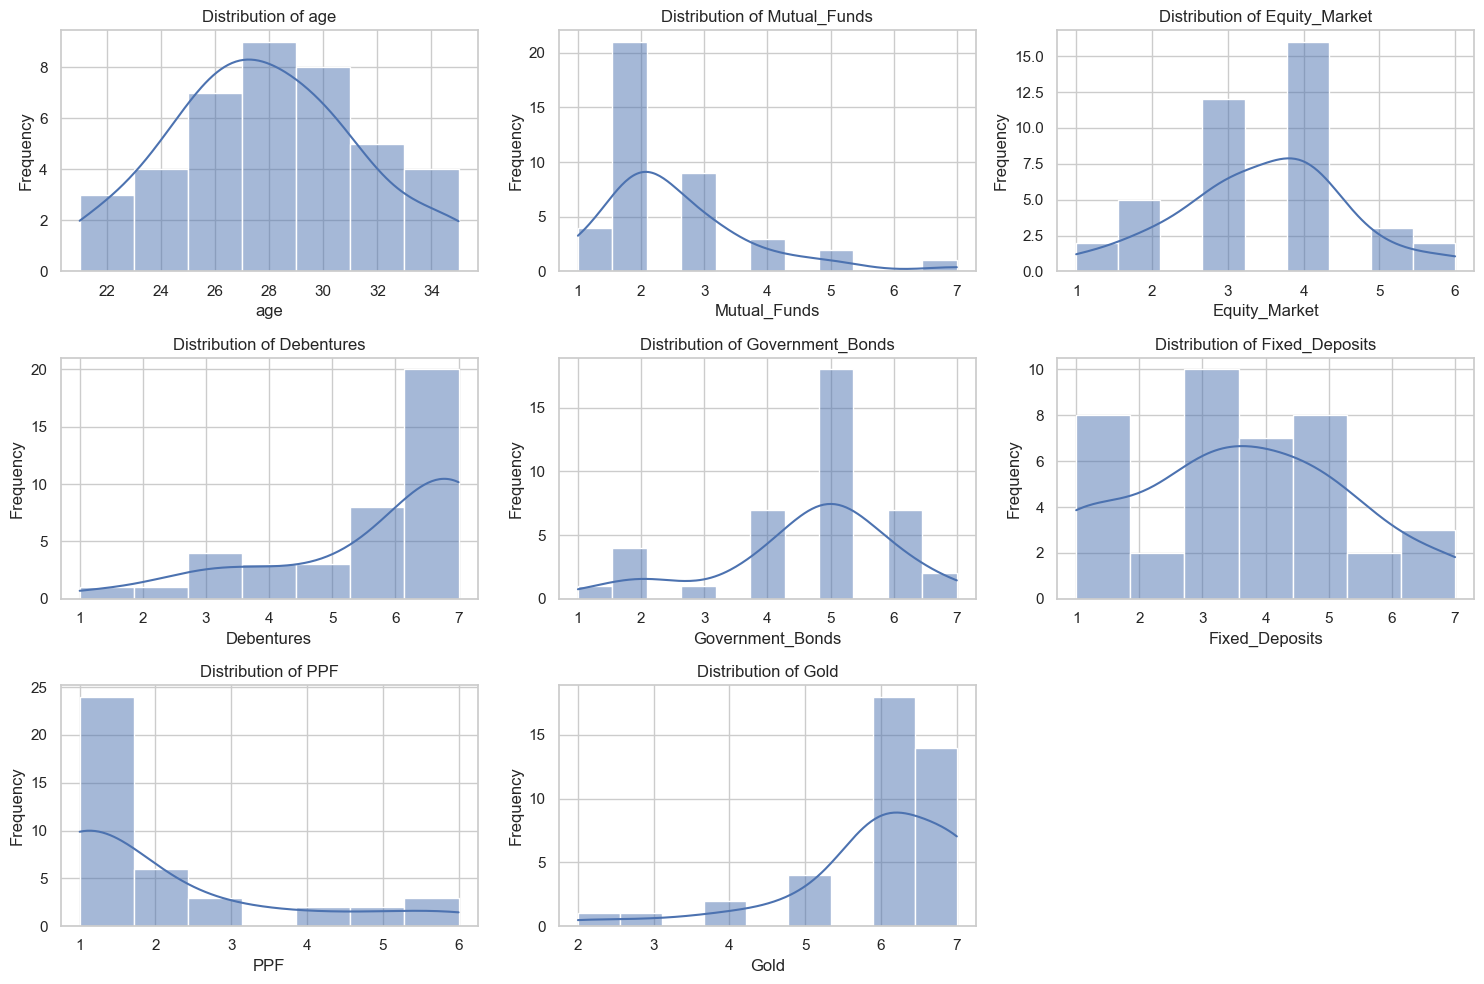

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# List of numeric columns
numeric_cols = ['age', 'Mutual_Funds', 'Equity_Market', 'Debentures', 
                'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold']

# Plot histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(finance_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


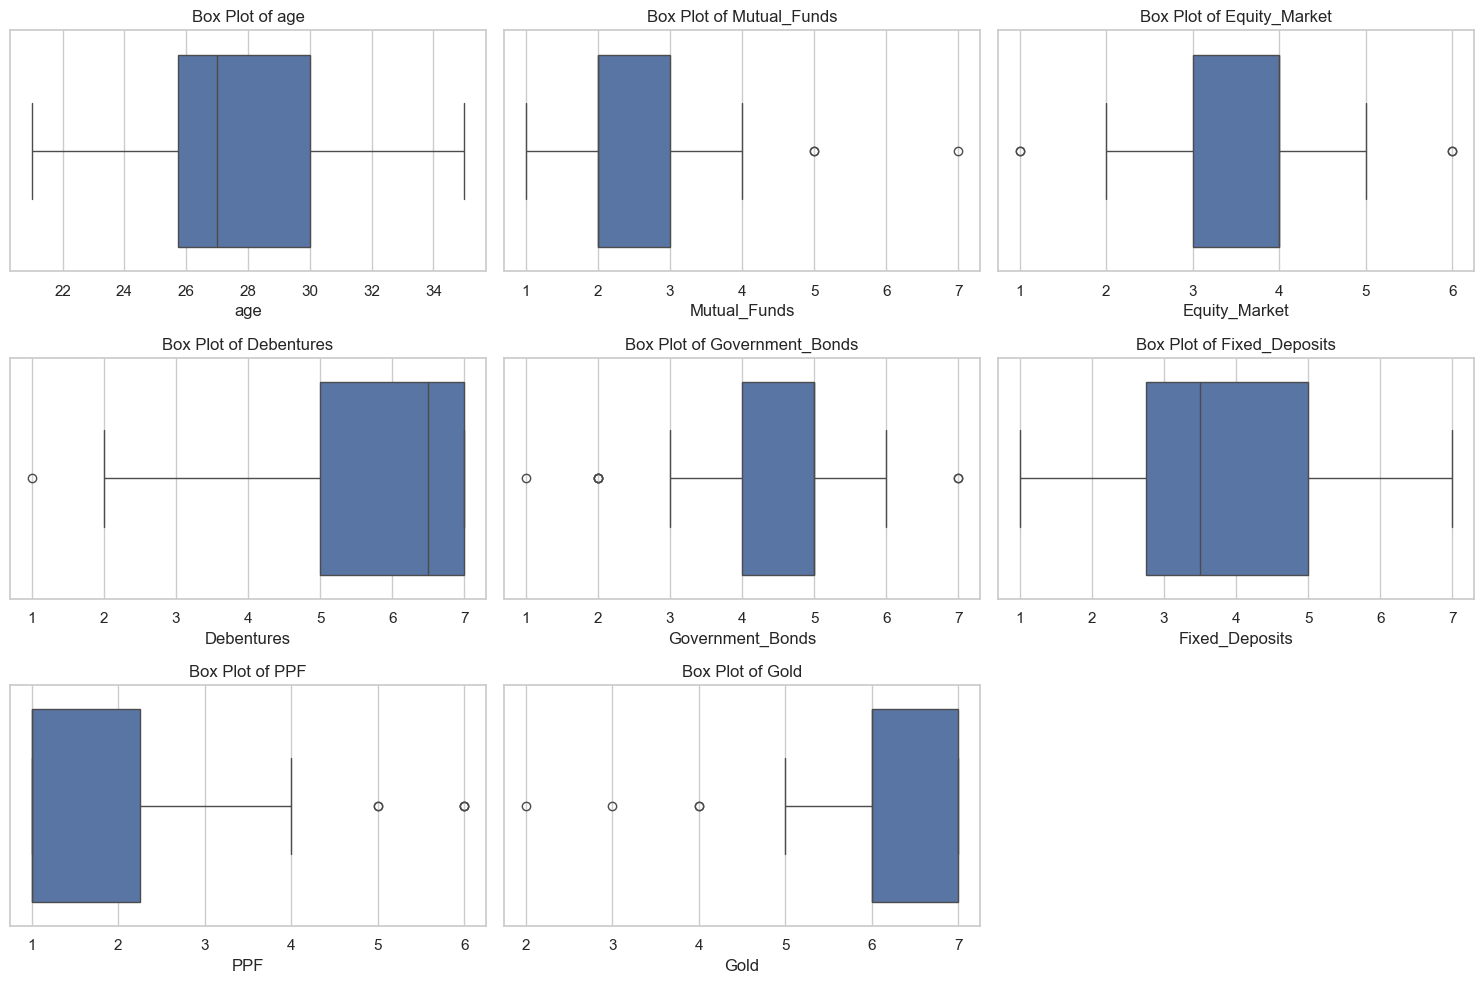

In [94]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=finance_data[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


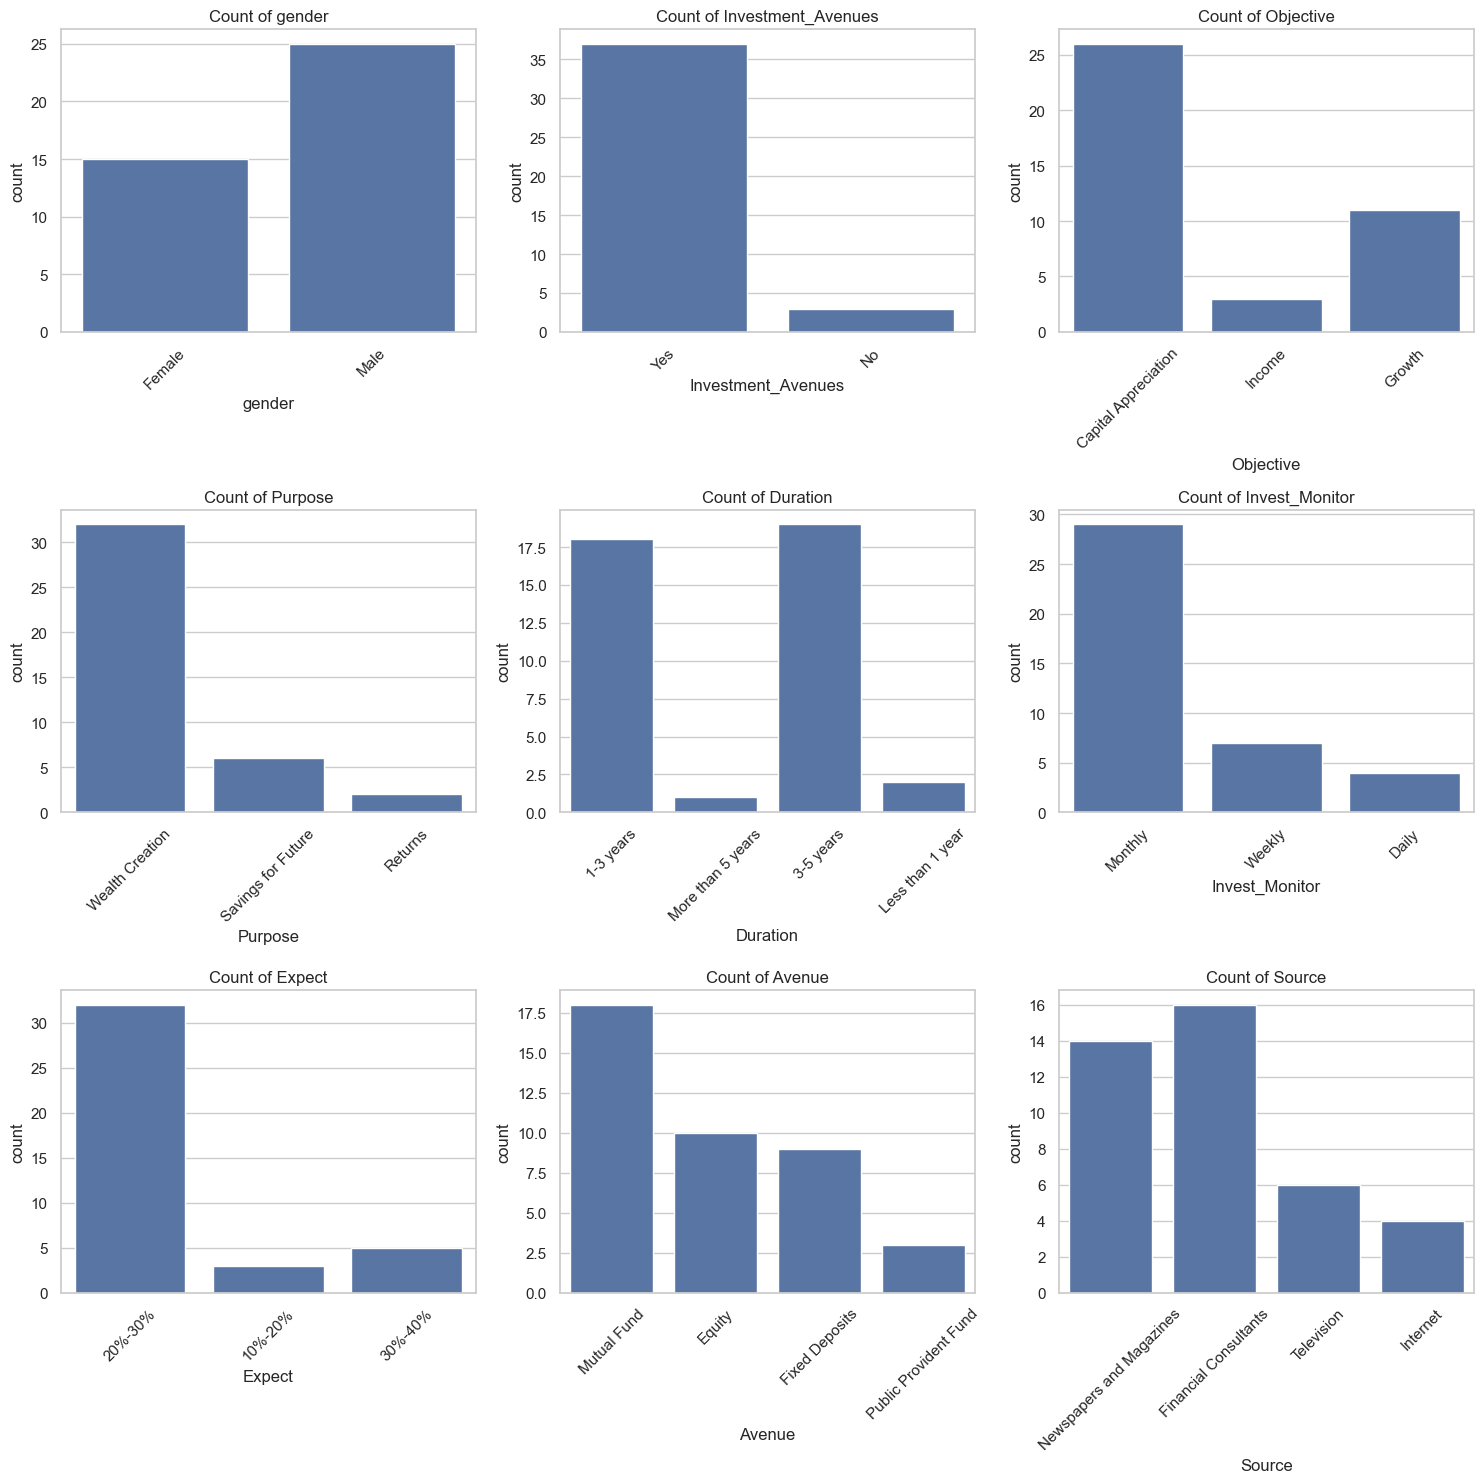

In [95]:
# List of categorical columns
categorical_cols = ['gender', 'Investment_Avenues', 'Objective', 
                    'Purpose', 'Duration', 'Invest_Monitor', 
                    'Expect', 'Avenue', 'Source']

# Plot bar charts for categorical columns
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=finance_data, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in finance_data .select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    finance_data[column] = le.fit_transform(finance_data[column])
    label_encoders[column] = le

# Display the transformed data
print(finance_data.head())

   gender  age  Investment_Avenues  Mutual_Funds  Equity_Market  Debentures  \
0       0   34                   1             1              2           5   
1       0   23                   1             4              3           2   
2       1   30                   1             3              6           4   
3       1   22                   1             2              1           3   
4       0   24                   0             2              1           3   

   Government_Bonds  Fixed_Deposits  PPF  Gold  ...  Duration  Invest_Monitor  \
0                 3               7    6     4  ...         0               1   
1                 1               5    6     7  ...         3               2   
2                 2               5    1     7  ...         1               0   
3                 7               6    4     5  ...         2               0   
4                 6               4    5     7  ...         2               0   

   Expect  Avenue  What are your savin

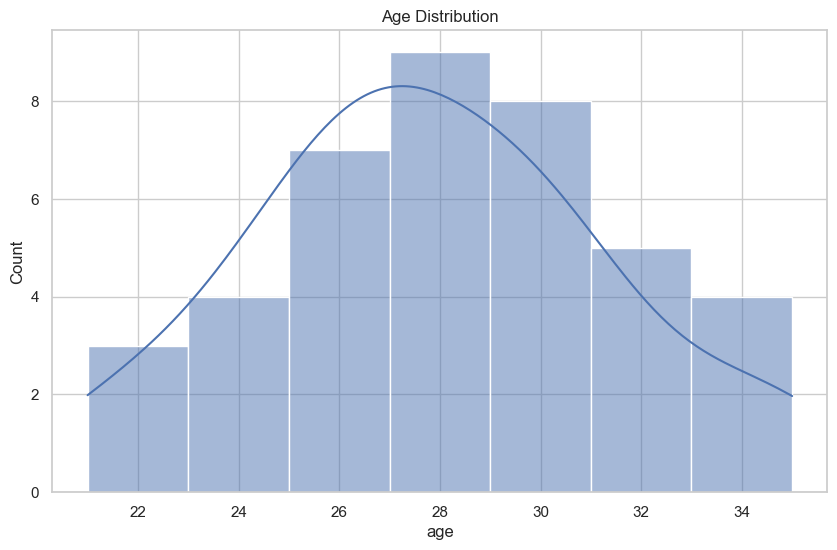

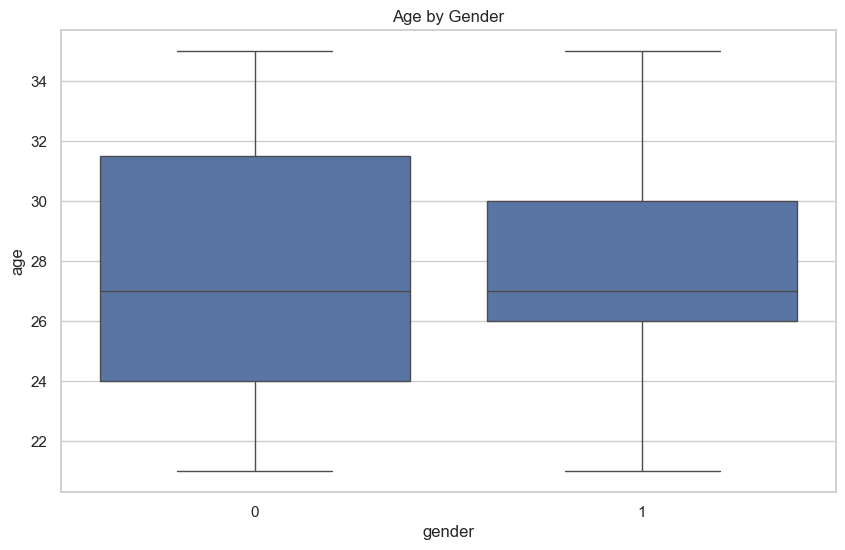

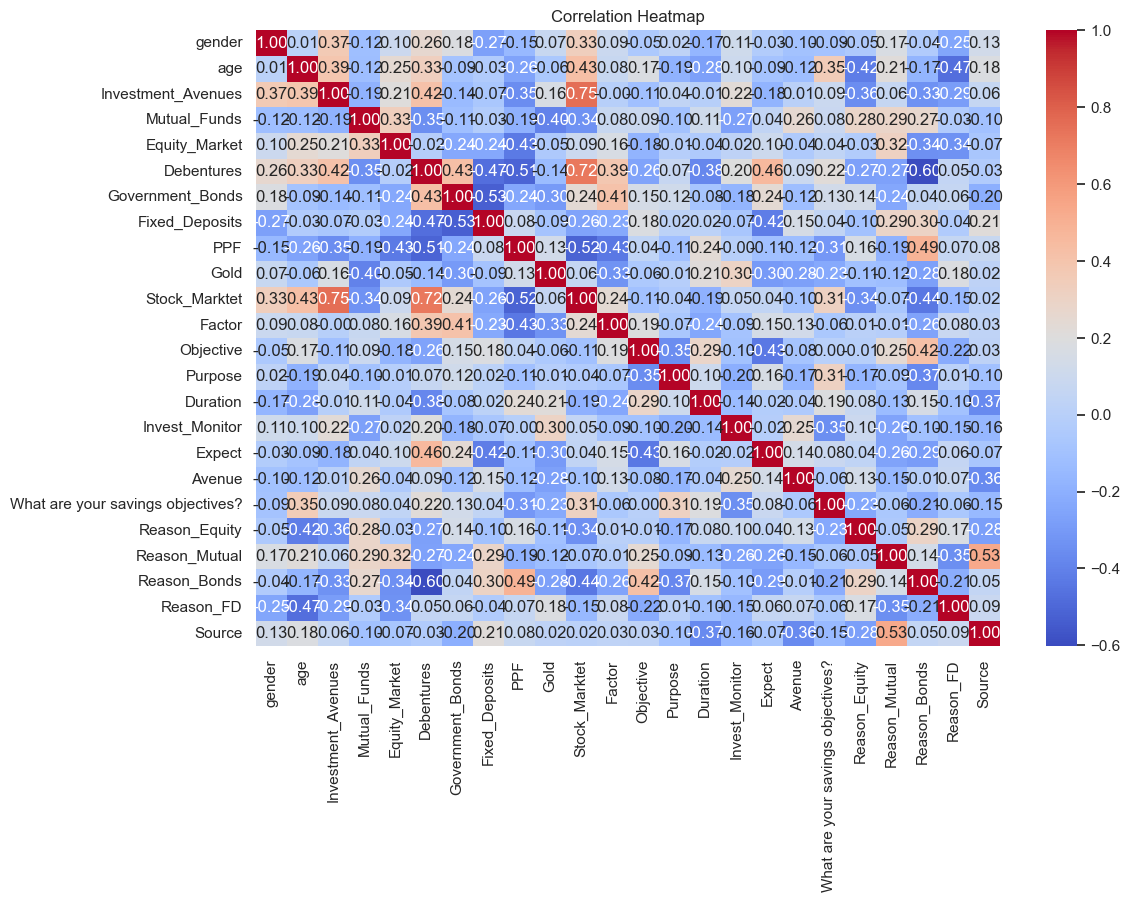

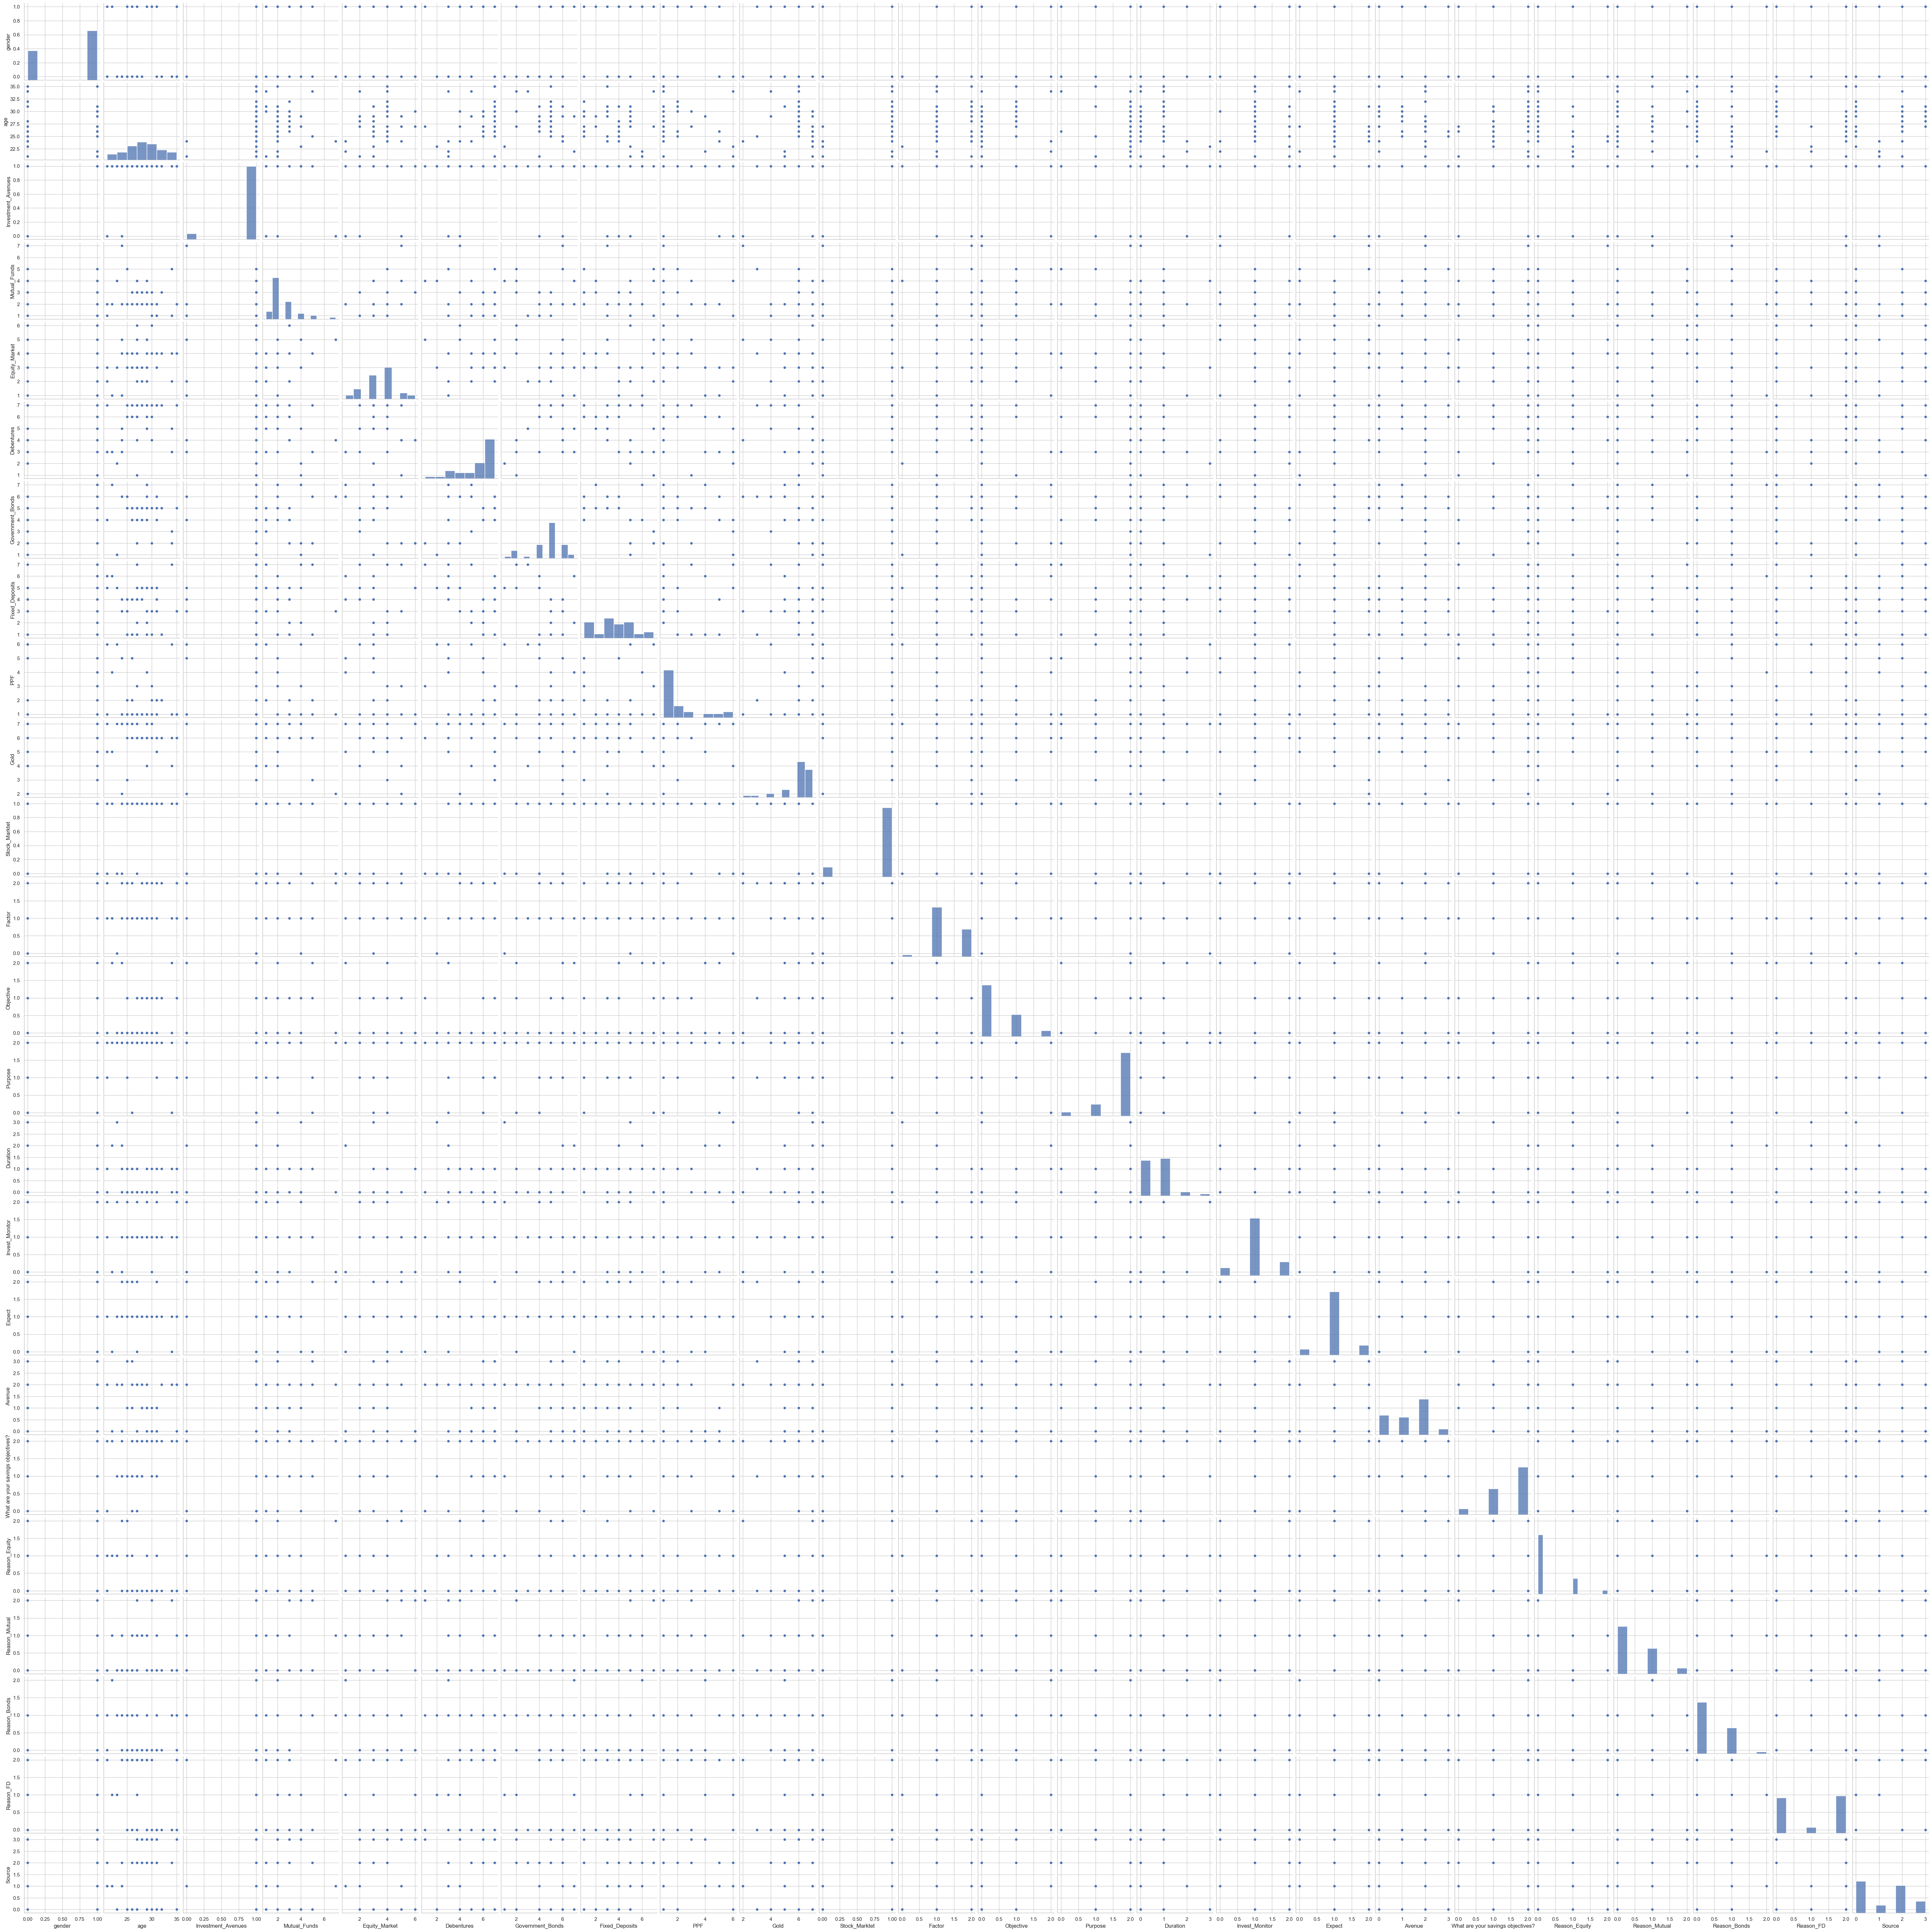

In [97]:
# Set the style for the plots
sns.set(style="whitegrid")

# Example Histograms
plt.figure(figsize=(10, 6))
sns.histplot(finance_data['age'], kde=True)  # Remove the space before the bracket
plt.title('Age Distribution')
plt.show()

# Example Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=finance_data['gender'], y=finance_data['age'])  # Use 'finance_data' for both axes
plt.title('Age by Gender')
plt.show()

# Example Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(finance_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Example Pair Plot
sns.pairplot(finance_data)  # Use 'finance_data' instead of 'data'
plt.show()

In [103]:
# Select relevant features for modeling
X = data[['feature1', 'feature2', ...]]
y = data['withdrawal_target']  

TypeError: unhashable type: 'list'

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
model = ARIMA()  
model.fit(X_train, y_train)

TypeError: ARIMA.__init__() missing 1 required positional argument: 'endog'

In [107]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

In [102]:
# Create the Date column correctly (using 'ME' frequency)
data['Date'] = pd.date_range(start='2022-01-01', periods=len(data), freq='ME')

# Select the columns as a DataFrame, not a dictionary
prophet_df = data[['Date', 'Savings_Growth']]

# No need to rename columns for Prophet as they are already named 'ds' and 'y'

TypeError: unhashable type: 'list'

For the Reason_Equity column, you might have sentences like:

"Capital Appreciation"
"Good returns"
"Risky investment"
Preprocessing:

Tokenization:
"Capital Appreciation" -> ["Capital", "Appreciation"]
Stemming:
"Appreciation" -> "Appreciate"
Feature Engineering:

Create a vocabulary of unique words from all reasons.
Represent each reason as a vector where each element corresponds to the frequency of a word in the vocabulary.
Model Training:

Train a Naive Bayes classifier using the labeled data.
Prediction:

Feed a new reason into the trained model.


The model will predict the sentiment category based on the learned patterns.
Additional Considerations:

Data Quality: Ensure the labeled data is representative and well-balanced.
Contextual Understanding: Consider incorporating domain-specific knowledge (e.g., financial terms) to improve accuracy.
Handling Negation: Address cases where words like "not" or "never" reverse the sentiment.
Dealing with Sarcasm or Irony: Identify and handle cases where the literal meaning doesn't match the intended sentiment.